# Análisis Exploratorio de Datos (Práctica)
**Objetivo:** Realizar un análisis exploratorio de datos en un dataset de marketing bancario.

**Instrucciones:**

1. **Carga del Dataset:**
    * Utilizar el dataset Bank Marketing de la UCI.
2. **Tareas:**
    * Visualizar distribuciones de las características numéricas.
    * Analizar la correlación entre las características.
    * Identificar y tratar valores atípicos.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Agregar la carpeta 'src' al sys.path
import sys
import os

sys.path.append(os.path.abspath("../src"))

# Ahora puedes importar utils
from utils import cargar_datos_pd
from utils import ver_resumen_nulos
from utils import limpiar_letras_de_numeros
from utils import obtener_filas_no_numericas
from utils import identificar_atipicos_IQR
from utils import ver_diccionario
from utils import imprimir_bigotes
from utils import obtener_filas_no_fechas

ruta_archivo = "../data/bank-full.csv"
columna = 'nombre_columna'
titulo = 'titulo'
#Carganos el archivo. Se modifico manualmente el archivo para la limpieza.
# Carga los datos del archivo CSV utilizando Pandas.
df = pd.read_csv(ruta_archivo, sep=';',header=0)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Supongamos que tu DataFrame original se llama df
df_numerico = df.select_dtypes(include='number')


In [5]:
df_numerico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   day       45211 non-null  int64
 3   duration  45211 non-null  int64
 4   campaign  45211 non-null  int64
 5   pdays     45211 non-null  int64
 6   previous  45211 non-null  int64
dtypes: int64(7)
memory usage: 2.4 MB


In [6]:
df_numerico.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')>

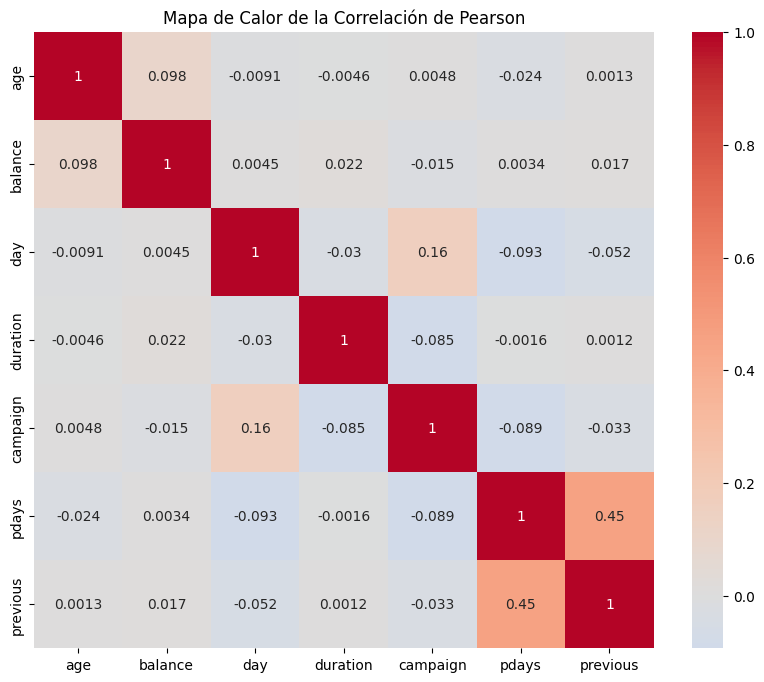

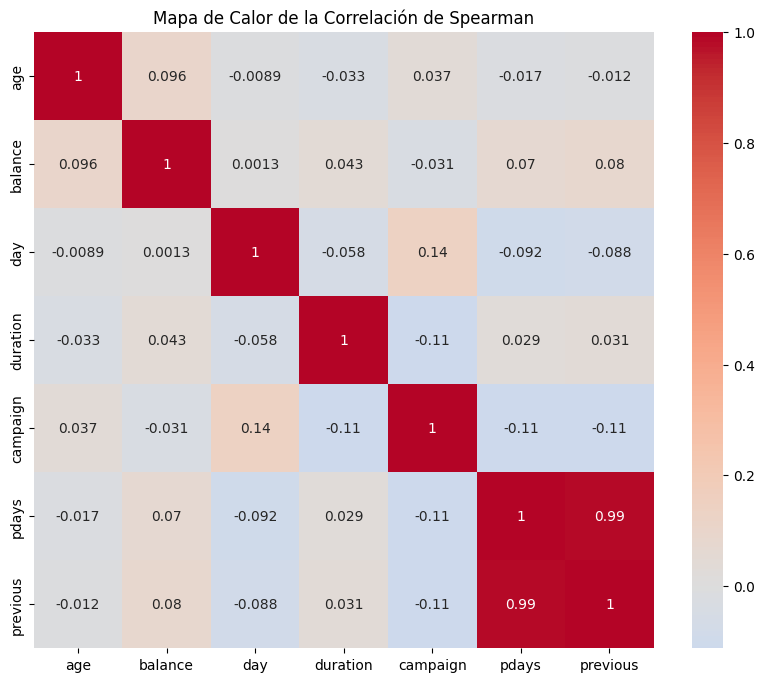

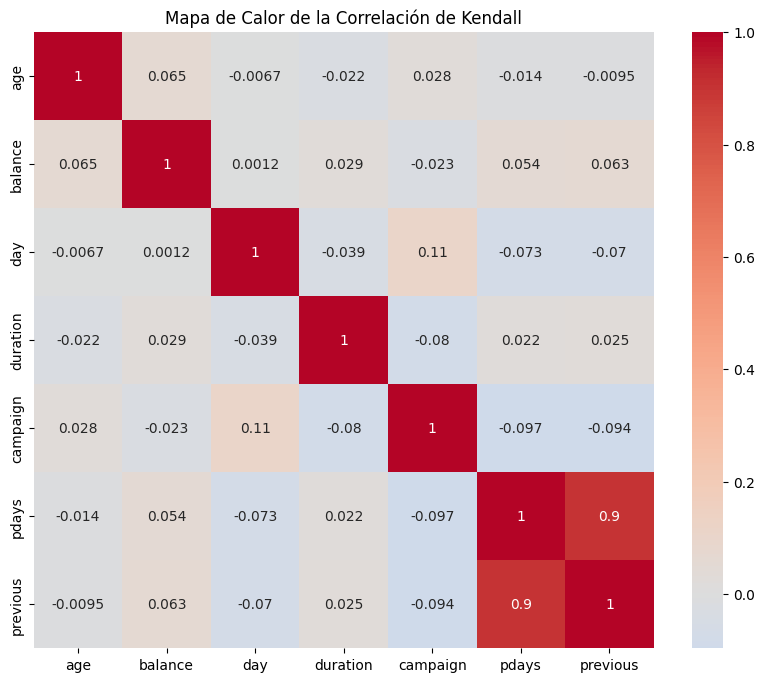

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_numerico[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].corr(method='pearson')
spearman_corr = df_numerico[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].corr(method='spearman')
kendall_corr = df_numerico[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].corr(method='kendall')

# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Spearman")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Kendall")
plt.show()

C:\Users\edgar\AppData\Local\Temp\ipykernel_12688\2152865840.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_numerico, x=columna, bins=30, kde=True, ax=ax_hist, stat='density', alpha=0.6, palette='pastel')
C:\Users\edgar\AppData\Local\Temp\ipykernel_12688\2152865840.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna, data=df_numerico, ax=ax_box, palette='pastel')


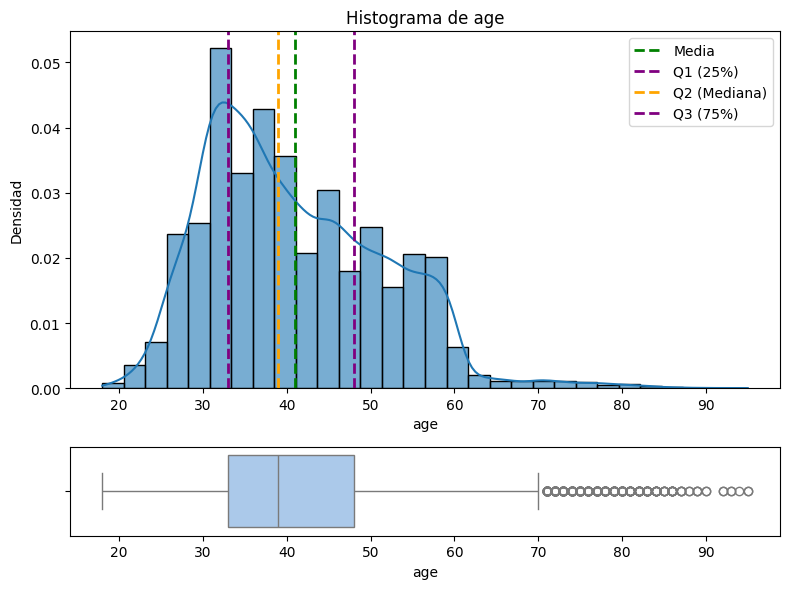

********************************************************************************
age
********************************************************************************
age
********************************************************************************
Límite inferior (bigote inferior): 10.5
Límite superior (bigote superior): 70.5


C:\Users\edgar\AppData\Local\Temp\ipykernel_12688\2152865840.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_numerico, x=columna, bins=30, kde=True, ax=ax_hist, stat='density', alpha=0.6, palette='pastel')
C:\Users\edgar\AppData\Local\Temp\ipykernel_12688\2152865840.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna, data=df_numerico, ax=ax_box, palette='pastel')


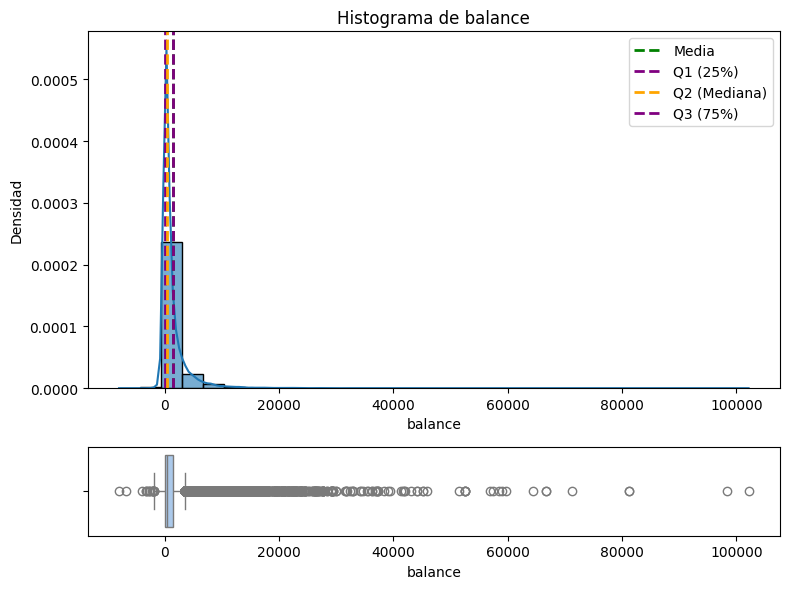

********************************************************************************
balance
********************************************************************************
balance
********************************************************************************
Límite inferior (bigote inferior): -1962.0
Límite superior (bigote superior): 3462.0


C:\Users\edgar\AppData\Local\Temp\ipykernel_12688\2152865840.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_numerico, x=columna, bins=30, kde=True, ax=ax_hist, stat='density', alpha=0.6, palette='pastel')
C:\Users\edgar\AppData\Local\Temp\ipykernel_12688\2152865840.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna, data=df_numerico, ax=ax_box, palette='pastel')


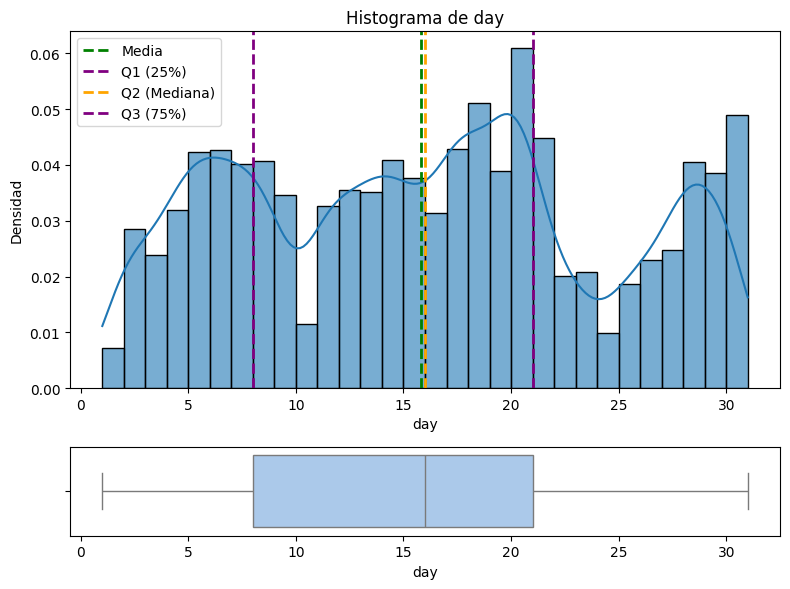

********************************************************************************
day
********************************************************************************
day
********************************************************************************
Límite inferior (bigote inferior): -11.5
Límite superior (bigote superior): 40.5


C:\Users\edgar\AppData\Local\Temp\ipykernel_12688\2152865840.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_numerico, x=columna, bins=30, kde=True, ax=ax_hist, stat='density', alpha=0.6, palette='pastel')
C:\Users\edgar\AppData\Local\Temp\ipykernel_12688\2152865840.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna, data=df_numerico, ax=ax_box, palette='pastel')


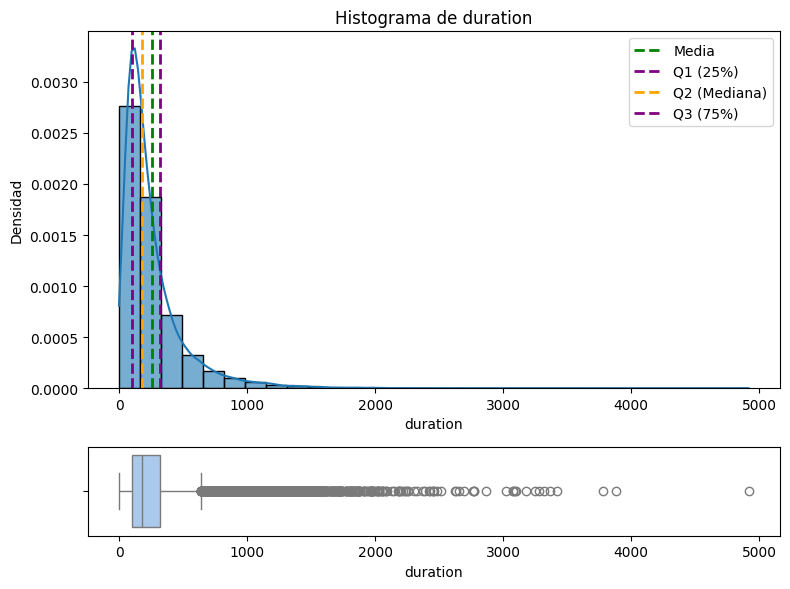

********************************************************************************
duration
********************************************************************************
duration
********************************************************************************
Límite inferior (bigote inferior): -221.0
Límite superior (bigote superior): 643.0


C:\Users\edgar\AppData\Local\Temp\ipykernel_12688\2152865840.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_numerico, x=columna, bins=30, kde=True, ax=ax_hist, stat='density', alpha=0.6, palette='pastel')
C:\Users\edgar\AppData\Local\Temp\ipykernel_12688\2152865840.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna, data=df_numerico, ax=ax_box, palette='pastel')


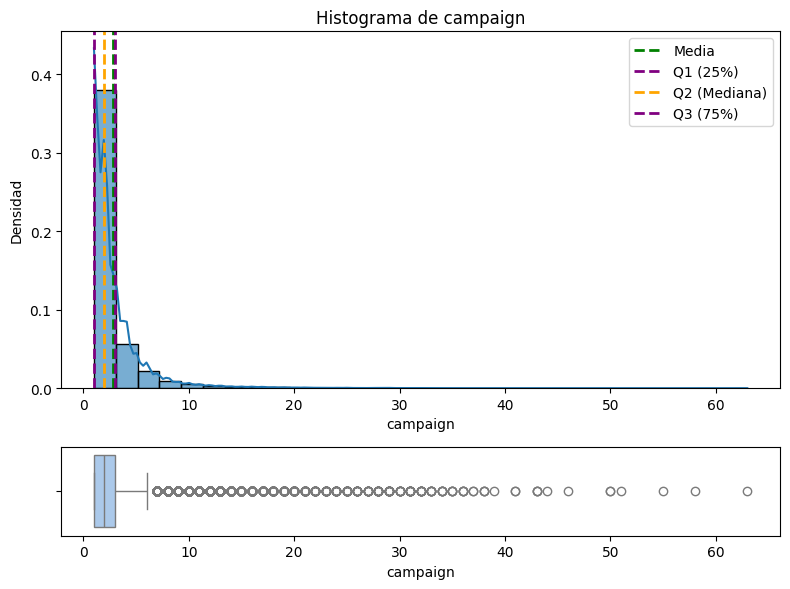

********************************************************************************
campaign
********************************************************************************
campaign
********************************************************************************
Límite inferior (bigote inferior): -2.0
Límite superior (bigote superior): 6.0


C:\Users\edgar\AppData\Local\Temp\ipykernel_12688\2152865840.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_numerico, x=columna, bins=30, kde=True, ax=ax_hist, stat='density', alpha=0.6, palette='pastel')
C:\Users\edgar\AppData\Local\Temp\ipykernel_12688\2152865840.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna, data=df_numerico, ax=ax_box, palette='pastel')


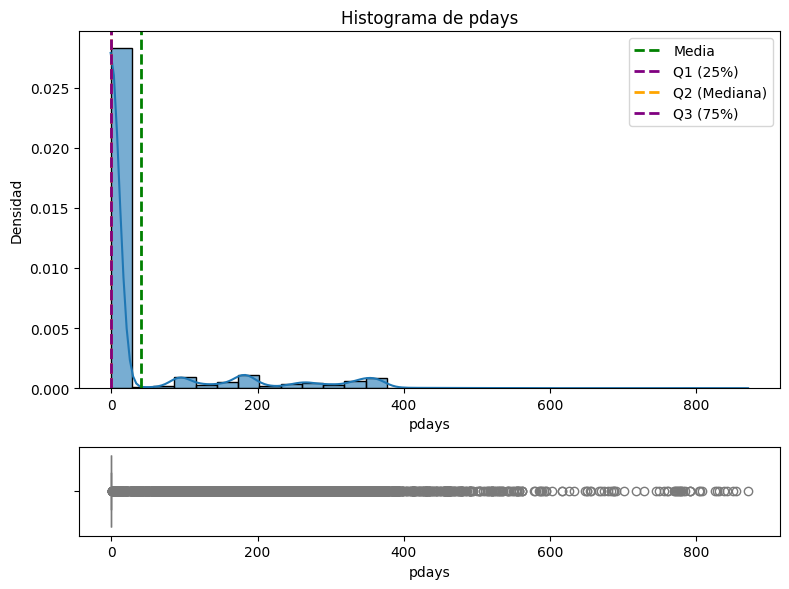

********************************************************************************
pdays
********************************************************************************
pdays
********************************************************************************
Límite inferior (bigote inferior): -1.0
Límite superior (bigote superior): -1.0


C:\Users\edgar\AppData\Local\Temp\ipykernel_12688\2152865840.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_numerico, x=columna, bins=30, kde=True, ax=ax_hist, stat='density', alpha=0.6, palette='pastel')
C:\Users\edgar\AppData\Local\Temp\ipykernel_12688\2152865840.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna, data=df_numerico, ax=ax_box, palette='pastel')


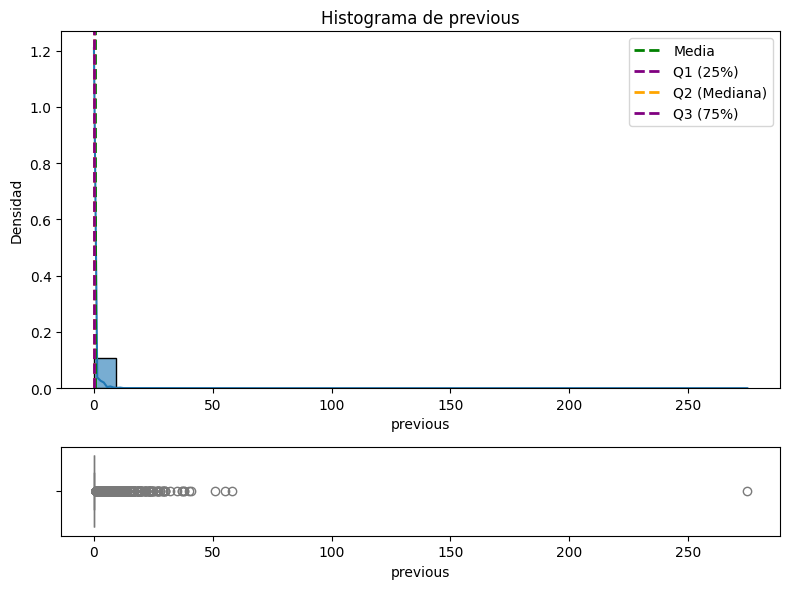

********************************************************************************
previous
********************************************************************************
previous
********************************************************************************
Límite inferior (bigote inferior): 0.0
Límite superior (bigote superior): 0.0


In [8]:
#  Identificación de valores atípicos usando el rango intercuartílico (IQR)
import seaborn as sns
import matplotlib.pyplot as plt
from utils import imprimir_bigotes

num_columns = df_numerico.select_dtypes(include=['int64', 'float64']).columns
for i, columna in enumerate(num_columns, 1):

    # Crear una figura con subplots: uno para el histograma y otro para el boxplot
    fig, (ax_hist, ax_box) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(8, 6))

    # Histograma con la curva de densidad, diferenciado por Churn
    sns.histplot(data=df_numerico, x=columna, bins=30, kde=True, ax=ax_hist, stat='density', alpha=0.6, palette='pastel')
    ax_hist.set_title(f'Histograma de {columna}')
    ax_hist.set_xlabel(f'{columna}')
    ax_hist.set_ylabel('Densidad')

    # Calcular y añadir líneas verticales para la media y los cuartiles
    media = df_numerico[columna].mean()
    q1 = df_numerico[columna].quantile(0.25)
    q2 = df_numerico[columna].quantile(0.5)  # También es la mediana
    q3 = df_numerico[columna].quantile(0.75)

    # Añadir líneas para la media y los cuartiles
    ax_hist.axvline(media, color='green', linestyle='--', linewidth=2, label='Media')
    ax_hist.axvline(q1, color='purple', linestyle='--', linewidth=2, label='Q1 (25%)')
    ax_hist.axvline(q2, color='orange', linestyle='--', linewidth=2, label='Q2 (Mediana)')
    ax_hist.axvline(q3, color='purple', linestyle='--', linewidth=2, label='Q3 (75%)')

    # Añadir leyenda
    ax_hist.legend()

    # Boxplot horizontal, diferenciado por Churn
    sns.boxplot(x=columna, data=df_numerico, ax=ax_box, palette='pastel')
    ax_box.set_xlabel(f'{columna}')

    # Ajustar el espaciado entre los subplots
    plt.tight_layout()

    # Mostrar la figura
    plt.show()
    print('*'*80)
    print(f'{columna}')
    print('*'*80)
    print(f'{columna}')
    print('*'*80)
    imprimir_bigotes(df_numerico[columna].dropna())

In [13]:
df_numerico

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [16]:
# Eliminamos los outliers de previous para expresarlo mejor
df_numerico = df_numerico[df_numerico['previous']<100]

C:\Users\edgar\AppData\Local\Temp\ipykernel_12688\2007077388.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_numerico, x=columna, bins=30, kde=True, ax=ax_hist, stat='density', alpha=0.6, palette='pastel')
C:\Users\edgar\AppData\Local\Temp\ipykernel_12688\2007077388.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=columna, data=df_numerico, ax=ax_box, palette='pastel')


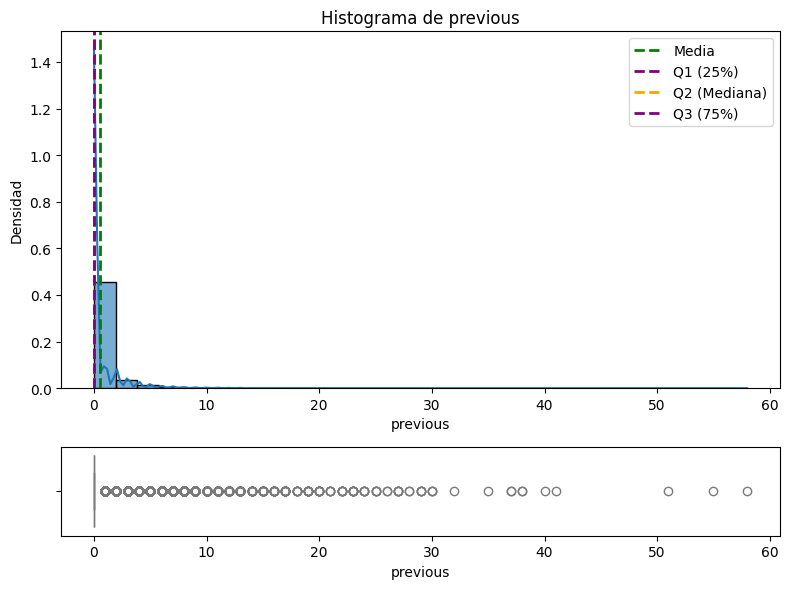

********************************************************************************
previous
********************************************************************************
previous
********************************************************************************
Límite inferior (bigote inferior): 0.0
Límite superior (bigote superior): 0.0


In [17]:
# Crear una figura con subplots: uno para el histograma y otro para el boxplot
columna = 'previous'
fig, (ax_hist, ax_box) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [4, 1]}, figsize=(8, 6))

# Histograma con la curva de densidad, diferenciado por Churn
sns.histplot(data=df_numerico, x=columna, bins=30, kde=True, ax=ax_hist, stat='density', alpha=0.6, palette='pastel')
ax_hist.set_title(f'Histograma de {columna}')
ax_hist.set_xlabel(f'{columna}')
ax_hist.set_ylabel('Densidad')

# Calcular y añadir líneas verticales para la media y los cuartiles
media = df_numerico[columna].mean()
q1 = df_numerico[columna].quantile(0.25)
q2 = df_numerico[columna].quantile(0.5)  # También es la mediana
q3 = df_numerico[columna].quantile(0.75)

# Añadir líneas para la media y los cuartiles
ax_hist.axvline(media, color='green', linestyle='--', linewidth=2, label='Media')
ax_hist.axvline(q1, color='purple', linestyle='--', linewidth=2, label='Q1 (25%)')
ax_hist.axvline(q2, color='orange', linestyle='--', linewidth=2, label='Q2 (Mediana)')
ax_hist.axvline(q3, color='purple', linestyle='--', linewidth=2, label='Q3 (75%)')

# Añadir leyenda
ax_hist.legend()

# Boxplot horizontal, diferenciado por Churn
sns.boxplot(x=columna, data=df_numerico, ax=ax_box, palette='pastel')
ax_box.set_xlabel(f'{columna}')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()
print('*'*80)
print(f'{columna}')
print('*'*80)
print(f'{columna}')
print('*'*80)
imprimir_bigotes(df_numerico[columna].dropna())